<!--BOOK_INFORMATION-->
<img align="left" style="width:80px;height:98px;padding-right:20px;" src="https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/pytorch-book-cover.jpg">

This notebook contains an excerpt from the [PyTorch Pocket Reference](http://pytorchbook.com) book by [Joe Papa](http://joepapa.ai); content is available [on GitHub](https://github.com/joe-papa/pytorch-book).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-papa/pytorch-book/blob/main/01_Getting_Started.ipynb)

# Chapter 1 - An Introduction to PyTorch

## Verifying Your PyTorch Setup

In [13]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.0.1+cu118
False


## A Fun Example

In [14]:
import urllib.request
url = 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fencrypted-tbn2.gstatic.com%2Flicensed-image%3Fq%3Dtbn%3AANd9GcSzzhGZZnAep-Oj7T_x6gREr6VDz61yDRiTm7XKY9_3vtylbSrlR4zi6B2YRtwLG4aEnkgkGWLAMpWfCG4&psig=AOvVaw0S8CFvPC7fKPvcqE8mGE1d&ust=1694367800799000&source=images&cd=vfe&opi=89978449&ved=0CA8QjRxqFwoTCJiO2YmKnoEDFQAAAAAdAAAAABAE'
fpath = 'butterfly.jpg'
urllib.request.urlretrieve(url, fpath)

('butterfly.jpg', <http.client.HTTPMessage at 0x7ecbe1461f60>)

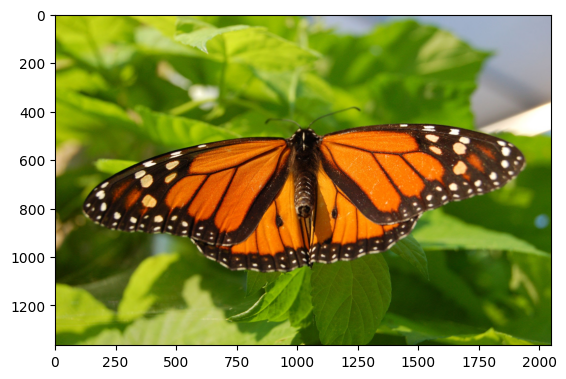

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('butterfly.jpg')
plt.imshow(img)

In [17]:
import torch
from torchvision import transforms

transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_tensor = transform(img)
print(type(img_tensor), img_tensor.shape)
# out:
# <class 'torch.Tensor'> torch.Size([3, 224, 224])

<class 'torch.Tensor'> torch.Size([3, 224, 224])


In [18]:
batch = torch.unsqueeze(img_tensor, 0)
print(batch.shape)
# out: torch.Size([1, 3, 224, 224])

torch.Size([1, 3, 224, 224])


In [19]:
from torchvision import models

model = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 73.8MB/s]


In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# out(results will vary): cpu

model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)
# out: torch.Size([1, 1000])

cpu
torch.Size([1, 1000])


In [21]:
y_max, index = torch.max(y,1)
print(index, y_max)

tensor([323]) tensor([30.2648], grad_fn=<MaxBackward0>)


In [22]:
import urllib.request
url = "https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/imagenet_class_labels.txt"
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

with open('imagenet_class_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()]

print(classes[index])

323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus',


In [23]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
print(classes[index[0]], prob[index[0]].item())

323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus', 99.32904052734375


In [24]:
_, indices = torch.sort(y, descending=True)

for idx in indices[0][:5]:
  print(classes[idx], prob[idx].item())

323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus', 99.32904052734375
326: 'lycaenid, lycaenid butterfly', 0.31542161107063293
325: 'sulphur butterfly, sulfur butterfly', 0.2830534279346466
322: 'ringlet, ringlet butterfly', 0.07106207311153412
318: 'lacewing, lacewing fly', 0.0010745801264420152


### Short Version

In [28]:
import torch
from torchvision import transforms, models
import urllib.request
import matplotlib.pyplot as plt

url = 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fencrypted-tbn2.gstatic.com%2Flicensed-image%3Fq%3Dtbn%3AANd9GcSzzhGZZnAep-Oj7T_x6gREr6VDz61yDRiTm7XKY9_3vtylbSrlR4zi6B2YRtwLG4aEnkgkGWLAMpWfCG4&psig=AOvVaw0S8CFvPC7fKPvcqE8mGE1d&ust=1694367800799000&source=images&cd=vfe&opi=89978449&ved=0CA8QjRxqFwoTCJiO2YmKnoEDFQAAAAAdAAAAABAE'
fpath = 'butterfly.jpg'
urllib.request.urlretrieve(url, fpath)


from PIL import Image

img = Image.open(fpath).convert('RGB')  #Converted to RGB format for a multi channel image


#plt.imshow(img)

transform = transforms.Compose([
  transforms.Resize(260),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_tensor = transform(img)
batch = torch.unsqueeze(img_tensor, 0)
model = models.alexnet(pretrained=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.eval()
model.to(device)
y = model(batch.to(device))

url = "https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/imagenet_class_labels.txt"
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

with open('imagenet_class_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()]

prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
  print(classes[idx], prob[idx].item())

323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus', 99.51441192626953
326: 'lycaenid, lycaenid butterfly', 0.3055722415447235
325: 'sulphur butterfly, sulfur butterfly', 0.12966857850551605
322: 'ringlet, ringlet butterfly', 0.04949916526675224
318: 'lacewing, lacewing fly', 0.0006519766175188124


In [26]:
import urllib

url = "https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/imagenet_class_labels.txt"
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

word = 'butterfly'

with open('imagenet_class_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()]
flag=0
for i in classes:
  if 'butterfly' in i:
    print("Yes "+ word +" is in the class - " + i)
    flag+=1
if flag ==0:
  print("No  "+ word +"  is not in any of the 1000 classes")

Yes butterfly is in the class - 322: 'ringlet, ringlet butterfly',
Yes butterfly is in the class - 323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus',
Yes butterfly is in the class - 324: 'cabbage butterfly',
Yes butterfly is in the class - 325: 'sulphur butterfly, sulfur butterfly',
Yes butterfly is in the class - 326: 'lycaenid, lycaenid butterfly',


Answers

1. Yes The word butterfly is in the 1000-label ImageNet.
2. The classification result is monarch butterfly , milkweed butterfly, Danaus plexippus.
3. The similar labels in ImageNet are lycaenid, lycaenid butterfly, sulphur butterfly, sulfur butterfly,ringlet/ ringlet butterfly , lacewing, lacewing butterfly.
4. The classification result is 99.5% confident that its a monarch butterfly also known as milkweed butterfly.